In [3]:
import pandas as pd
import numpy as np

df1=pd.read_csv('RM_ptx_information.csv')
columns=['MRN','IRB']
df1=df1[columns]
df3=df1[df1.IRB!='8980']
df1=df1[df1.IRB=='8980']

print(df1.shape[0])
print(df3.shape[0])

160
204


In [2]:
import re
df2=pd.read_csv('no_recur_mrns.csv')
df2.columns
columns=['MRN','trial']
df2=df2[columns]
print (df2.shape[0])

def isOPTIMA(trial):
    try:
        search=re.search('OPTIMA',trial)
        if search:
            return True
        else:
            return False
    except:
        return False
mask=df2.trial.apply(isOPTIMA)
df2=df2[mask]
print (df2.shape[0])

246
92


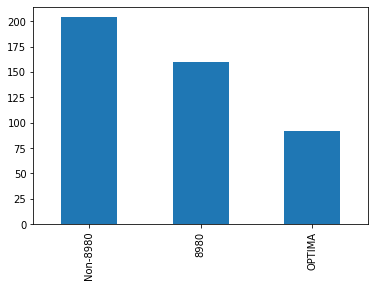

In [4]:
import matplotlib.pyplot as plt

data=[]
for mrn in df1.MRN:
    data.append([mrn,'8980'])
for mrn in df2.MRN:
    data.append([mrn,'OPTIMA'])
for mrn in df3.MRN:
    data.append([mrn,'Non-8980'])
df=pd.DataFrame(data,columns=['MRN','Source'])

df.to_csv('all_mrns_of_interest.csv')

df['Source'].value_counts().plot(kind='bar')